In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
import json
import pprint
from sklearn.mixture import BayesianGaussianMixture

In [3]:
import seaborn as sns
sns.set(color_codes=True)

# Preprocess

### まず実験結果の読み込み

In [4]:
targetDir = "../data/output/Result1/Result/"
speedDir = "../data/output/Result1/Speed/"
brakeDir = "../data/output/Result1/Brake/"
accelDIr = "../data/output/Result1/Accel/"
accelOffDir = "../data/output/Result1/AccelOff/"
turnRightDir = "../data/output/Result1/TurnRight/"
turnLeftDir = "../data/output/Result1/TurnLeft/"
manyCarDir = "../data/output/Result1/ManyCars/"
middleCarDir = "../data/output/Result1/MiddleCars/"
lessCarDir = "../data/output/Result1/LessCars/"
afternoonSunMax = "../data/output/Result1/AfternoonSunMax/"
afternoonSunMiddle = "../data/output/Result1/AfternoonSunMiddle/"
afternoonSunMin = "../data/output/Result1/AfternoonSunMin/"
cloudMax = "../data/output/Result1/CloudMax/"
cloudMiddle = "../data/output/Result1/CloudMiddle/"
cloudMin = "../data/output/Result1/CloudMin/"

### 読み込んだデータを元に data-frame を作成

In [5]:
df1 = pd.read_csv(speedDir + "result.csv")
df1.columns = [["id", "slow", "green", "yellow", "red"]]
df2 = pd.read_csv(brakeDir + "result.csv")
df2.columns = [["id", "brake"]]
df3 = pd.read_csv(accelDIr + "result.csv")
df3.columns = [["id", "accel"]]
df4 = pd.read_csv(turnRightDir + "result.csv")
df4.columns = [["id", "turnRight"]]
df5 = pd.read_csv(turnLeftDir + "result.csv")
df5.columns = [["id", "turnLeft"]]
df6 = pd.read_csv(afternoonSunMax + "result.csv")
df6.columns = [["id", "sunMax"]]
df7 = pd.read_csv(afternoonSunMiddle + "result.csv")
df7.columns = [["id", "sunMiddle"]]
df8 = pd.read_csv(afternoonSunMin + "result.csv")
df8.columns = [["id", "sunMin"]]
df9 = pd.read_csv(cloudMax + "result.csv")
df9.columns = [["id", "cloudMax"]]
df10 = pd.read_csv(cloudMiddle + "result.csv")
df10.columns = [["id", "cloudMiddle"]]
df11 = pd.read_csv(cloudMin + "result.csv")
df11.columns = [["id", "cloudMin"]]
df12 = pd.read_csv(manyCarDir + "result.csv")
df12.columns = [["id", "manyCars"]]
df13 = pd.read_csv(middleCarDir + "result.csv")
df13.columns = [["id", "middleCars"]]
df14 = pd.read_csv(lessCarDir + "result.csv")
df14.columns = [["id", "lessCars"]]

### Merge

In [6]:
def mergeFrames(dfs, key="id"):
    if len(dfs) == 0:
        return pd.DataFrame()
    
    acc = dfs[0]
    for df in dfs[1:]:
        acc = pd.merge(acc, df, on="id")
        
    return acc

In [7]:
df = mergeFrames([df1, df2, df3, df6, df7, df8, df9, df10, df11, df12, df13, df14])
gridSize = len(df)

### Rename

In [8]:
features =  [
    "red",  "yellow",  "green", "slow", 
    "brake", "accel", 
    "sunMax", "sunMiddle", "sunMin",
    "cloudMax", "cloudMiddle", "cloudMin",
    "manyCars", "middleCars", "lessCars"
]

### 必要なデータだけ取り出す (通った経路だけ)

In [9]:
mf = df[df['red'] + df['yellow'] + df['green'] + df['slow'] > 0]
mf = mf[features]

### 確認

In [10]:
mf.describe()

,red,yellow,green,slow,brake,accel,sunMax,sunMiddle,sunMin,cloudMax,cloudMiddle,cloudMin,manyCars,middleCars,lessCars
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,11.991870,133.609756,78.211382,155.894309,8.634146,18.048780,101.243902,83.552846,194.910569,134.406504,52.666667,192.634146,65.414634,36.390244,277.902439
std,29.764512,83.804675,116.664311,492.554180,11.072983,14.551691,136.674397,94.135776,414.956881,168.708490,51.929755,420.551575,72.397234,34.061091,491.127398
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,81.000000,0.000000,0.000000,0.000000,6.000000,13.000000,25.500000,62.000000,29.000000,17.000000,46.000000,21.500000,15.000000,85.000000
50%,0.000000,119.000000,12.000000,0.000000,4.000000,15.000000,43.000000,57.000000,107.000000,79.000000,35.000000,99.000000,37.000000,26.000000,158.000000
75%,3.000000,189.000000,138.500000,71.500000,13.500000,26.000000,139.500000,107.500000,169.000000,164.500000,71.000000,173.500000,89.000000,46.000000,234.500000
max,129.000000,392.000000,544.000000,3831.000000,57.000000,69.000000,729.000000,669.000000,3571.000000,914.000000,293.000000,3557.000000,464.000000,209.000000,4040.000000


In [11]:
# colors = [
#   "#FE2400",
#   "#B21D72",
#   "#5023D0",
#   "#247395",
#   "#FFFF01",
#   "#FEAF07",
#   "#247395",
# ]

In [12]:
colors = [
    "#FE2400",
    "#EC2127",
    "#D21E4E",
    "#B21D72",
    "#951E93",
    "#7421B1",
    "#5023D0",
    "#3025EA",
    "#082EFD",
    "#1147CE",
    "#247395",
    "#389D51",
    "#49C900",
    "#81D503",
    "#AFE400",
    "#DAF201",
    "#FFFF01",
    "#FEE600",
    "#FECD02",
    "#FEAF07",
    "#FF9400",
    "#FE7701",
    "#FD5800",
    "#FF3900",
]

# VBGMM

### 各特徴料を正規化する下準備

In [13]:
normedFeatures = [
    "red",  "yellow",  "green",
    "brake", "accel", 
    "sunMax", "sunMiddle",
    "cloudMax", "cloudMiddle",
    "manyCars", "middleCars"
]

In [14]:
speeds = ["red", "yellow", "green", "slow"]
pedals = ["brake", "accel"]
suns = ["sunMax", "sunMiddle", "sunMin",]
clouds = ["cloudMax", "cloudMiddle", "cloudMin",]
detectCars = ["manyCars", "middleCars", "lessCars"]

### 各特徴料を正規化

In [15]:
bf = mf.copy()
bf["sumSpeed"] = bf["red"] + bf["yellow"] + bf["green"] + bf["slow"]
bf["sumPedal"] = bf["brake"] + bf["accel"] 
bf["sumSuns"] = bf["sunMax"] + bf["sunMiddle"] + bf["sunMin"]
bf["sumClouds"] = bf["cloudMax"] + bf["cloudMiddle"] + bf["cloudMin"]
bf["sumDetect"] = bf["manyCars"] + bf["middleCars"] + bf["lessCars"]

for key in speeds:
    bf[key] = bf[key] / bf["sumSpeed"]
    
for key in pedals:
    bf[key] = bf[key] / bf["sumPedal"]

for key in suns:
    bf[key] = bf[key] /bf["sumSuns"]
    
for key in clouds:
    bf[key] = bf[key] /bf["sumClouds"]

for key in detectCars:
    bf[key] = bf[key] /bf["sumDetect"]
    
bf = bf.fillna(0)    
    
# bf = bf[features]
bf = bf[normedFeatures]

In [16]:
bf.describe()

,red,yellow,green,brake,accel,sunMax,sunMiddle,cloudMax,cloudMiddle,manyCars,middleCars
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,0.080068,0.590656,0.173269,0.226762,0.756977,0.260159,0.250583,0.363240,0.173227,0.196625,0.116595
std,0.173157,0.339190,0.210690,0.222738,0.241463,0.183125,0.120910,0.200093,0.096777,0.108029,0.046423
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015075,0.000000,0.000000,0.000000
25%,0.000000,0.284895,0.000000,0.000000,0.608696,0.086923,0.158286,0.190014,0.102174,0.130467,0.086857
50%,0.000000,0.566667,0.058252,0.200000,0.777778,0.259259,0.246575,0.399314,0.160237,0.167127,0.112821
75%,0.019141,0.941462,0.310593,0.385354,1.000000,0.404749,0.311382,0.487189,0.232524,0.243448,0.146257
max,0.592593,1.000000,1.000000,0.954545,1.000000,1.000000,1.000000,1.000000,0.666667,0.581818,0.235294


### ハイパーパラメータの設定

In [17]:
components = 24
prior = 0.01
cov_type = 'full'
cov_p_v = 0.08
cov_prior = cov_p_v * np.identity(len(normedFeatures))
max_iter = 200

### 一番良い seed 値をグリッドサーチする

In [18]:
def gridSearch():
    result = []
    for k in range(20):
        sd = k
        np.random.seed(sd)
        random.seed(sd)
    
        vb = BayesianGaussianMixture(
            n_components=components,
            weight_concentration_prior=prior, 
            covariance_type=cov_type,
            covariance_prior=cov_prior,
            max_iter=max_iter
        ).fit(bf)
        result.append({
                "seed": sd,
                "classes": len(set(vb.predict(bf))),
                "lower bounds": vb.lower_bound_
        })

    return sorted(result, key=lambda res: res["lower bounds"])

pprint.pprint(gridSearch())

[{'classes': 17, 'lower bounds': 7027.2989881638314, 'seed': 13},
 {'classes': 16, 'lower bounds': 7081.8163150199562, 'seed': 16},
 {'classes': 14, 'lower bounds': 7119.6739353074154, 'seed': 18},
 {'classes': 15, 'lower bounds': 7123.3777118591352, 'seed': 17},
 {'classes': 13, 'lower bounds': 7144.7640932877912, 'seed': 0},
 {'classes': 12, 'lower bounds': 7162.2757684556409, 'seed': 10},
 {'classes': 12, 'lower bounds': 7175.5670276066503, 'seed': 2},
 {'classes': 10, 'lower bounds': 7181.3128752691136, 'seed': 15},
 {'classes': 9, 'lower bounds': 7208.3267036575444, 'seed': 9},
 {'classes': 12, 'lower bounds': 7209.7104968445838, 'seed': 6},
 {'classes': 9, 'lower bounds': 7228.2663506776425, 'seed': 8},
 {'classes': 11, 'lower bounds': 7236.554109618929, 'seed': 4},
 {'classes': 10, 'lower bounds': 7237.8676258115847, 'seed': 1},
 {'classes': 10, 'lower bounds': 7238.9420660824271, 'seed': 7},
 {'classes': 9, 'lower bounds': 7249.859540437551, 'seed': 14},
 {'classes': 10, 'lower

### 上で得られた一番良いシード値に設定

In [19]:
sd = 16
np.random.seed(sd)
random.seed(sd)

### 実際に Bayesian Gaussian Mixture mode でクラスタリング

In [20]:
vb = BayesianGaussianMixture(
    n_components=components,
    weight_concentration_prior=prior, 
    covariance_type=cov_type,
    covariance_prior=cov_prior,
    max_iter=max_iter    
).fit(bf)
print "class size:      ", len(set(vb.predict(bf)))
print "classes:          ", set(vb.predict(bf))
print "lower bound: ", vb.lower_bound_

class size:       16
classes:           set([0, 2, 3, 6, 9, 10, 11, 12, 14, 17, 18, 19, 20, 21, 22, 23])
lower bound:  7081.81631502


### 結果の確認

In [21]:
vb.weights_

array([ 0.02418705,  0.00799824,  0.01586377,  0.11803621,  0.00779361,
        0.00772078,  0.02955622,  0.00757518,  0.00750244,  0.01486083,
        0.02204212,  0.01457128,  0.32947706,  0.00708283,  0.0138514 ,
        0.00682747,  0.00670214,  0.03287462,  0.02543111,  0.01262627,
        0.02467526,  0.01211147,  0.01166583,  0.23896679])

In [22]:
ws = ["%02f" % w for w in vb.weights_]

In [23]:
ref = pd.DataFrame(vb.means_)
ref.columns = [normedFeatures]
ref["slow"] = 1 - (ref["red"] + ref["yellow"] + ref["green"])
ref["sunMin"] = 1 - (ref["sunMax"] + ref["sunMiddle"])
ref["cloudMin"] = 1 - (ref["cloudMax"] + ref["cloudMiddle"])
ref["lessCars"] = 1 - (ref["manyCars"] + ref["middleCars"])
ref["weight"] = ws
ref.sort_values("weight", ascending=False)

,red,yellow,green,brake,accel,sunMax,sunMiddle,cloudMax,cloudMiddle,manyCars,middleCars,slow,sunMin,cloudMin,lessCars,weight
12,0.001753,0.282623,0.361228,0.352778,0.646866,0.351722,0.257471,0.446298,0.182334,0.199841,0.106734,0.354396,0.390806,0.371368,0.693425,0.329477
23,0.015682,0.918514,0.050487,0.123497,0.876112,0.233551,0.264143,0.335210,0.167486,0.168100,0.121463,0.015317,0.502305,0.497305,0.710436,0.238967
3,0.467530,0.510519,0.011552,0.015126,0.983790,0.070694,0.145745,0.186035,0.135114,0.164202,0.129448,0.010399,0.783561,0.678851,0.706350,0.118036
17,0.353806,0.575362,0.039610,0.095672,0.901074,0.162343,0.316191,0.463669,0.139559,0.171433,0.108032,0.031223,0.521466,0.396772,0.720535,0.032875
6,0.100749,0.795788,0.063088,0.498235,0.497557,0.161435,0.244643,0.347847,0.200054,0.215669,0.145366,0.040376,0.593923,0.452099,0.638965,0.029556
18,0.103080,0.813394,0.043953,0.099745,0.896132,0.371309,0.171115,0.424189,0.177975,0.320335,0.155662,0.039573,0.457576,0.397836,0.524003,0.025431
20,0.024597,0.859288,0.077057,0.119737,0.876192,0.093944,0.286206,0.154517,0.131458,0.439897,0.133249,0.039058,0.619849,0.714025,0.426854,0.024675
0,0.026696,0.380969,0.196201,0.669106,0.325473,0.154888,0.196766,0.212738,0.089375,0.102173,0.072337,0.396134,0.648346,0.697887,0.825490,0.024187
10,0.026737,0.733628,0.185213,0.575542,0.419030,0.389859,0.256528,0.440677,0.234135,0.290105,0.142322,0.054422,0.353613,0.325187,0.567574,0.022042
2,0.040038,0.295361,0.151854,0.113395,0.878474,0.390935,0.277463,0.485955,0.260516,0.207006,0.101777,0.512748,0.331602,0.253528,0.691217,0.015864


In [24]:
ref.sort_values("weight", ascending=False)[:len(set(vb.predict(bf)))]

,red,yellow,green,brake,accel,sunMax,sunMiddle,cloudMax,cloudMiddle,manyCars,middleCars,slow,sunMin,cloudMin,lessCars,weight
12,0.001753,0.282623,0.361228,0.352778,0.646866,0.351722,0.257471,0.446298,0.182334,0.199841,0.106734,0.354396,0.390806,0.371368,0.693425,0.329477
23,0.015682,0.918514,0.050487,0.123497,0.876112,0.233551,0.264143,0.335210,0.167486,0.168100,0.121463,0.015317,0.502305,0.497305,0.710436,0.238967
3,0.467530,0.510519,0.011552,0.015126,0.983790,0.070694,0.145745,0.186035,0.135114,0.164202,0.129448,0.010399,0.783561,0.678851,0.706350,0.118036
17,0.353806,0.575362,0.039610,0.095672,0.901074,0.162343,0.316191,0.463669,0.139559,0.171433,0.108032,0.031223,0.521466,0.396772,0.720535,0.032875
6,0.100749,0.795788,0.063088,0.498235,0.497557,0.161435,0.244643,0.347847,0.200054,0.215669,0.145366,0.040376,0.593923,0.452099,0.638965,0.029556
18,0.103080,0.813394,0.043953,0.099745,0.896132,0.371309,0.171115,0.424189,0.177975,0.320335,0.155662,0.039573,0.457576,0.397836,0.524003,0.025431
20,0.024597,0.859288,0.077057,0.119737,0.876192,0.093944,0.286206,0.154517,0.131458,0.439897,0.133249,0.039058,0.619849,0.714025,0.426854,0.024675
0,0.026696,0.380969,0.196201,0.669106,0.325473,0.154888,0.196766,0.212738,0.089375,0.102173,0.072337,0.396134,0.648346,0.697887,0.825490,0.024187
10,0.026737,0.733628,0.185213,0.575542,0.419030,0.389859,0.256528,0.440677,0.234135,0.290105,0.142322,0.054422,0.353613,0.325187,0.567574,0.022042
2,0.040038,0.295361,0.151854,0.113395,0.878474,0.390935,0.277463,0.485955,0.260516,0.207006,0.101777,0.512748,0.331602,0.253528,0.691217,0.015864


# Plot histgram of each clusters

### ヒストグラムの表示と保存

In [25]:
cls = ref.sort_values("weight", ascending=False)[:len(set(vb.predict(bf)))].index

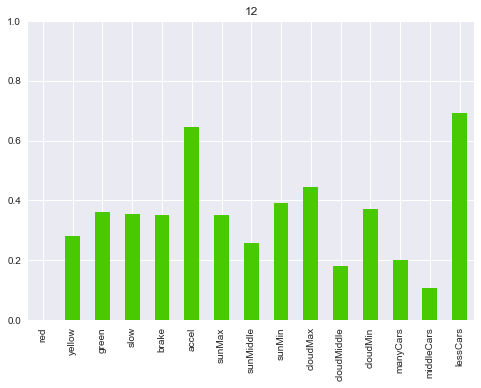

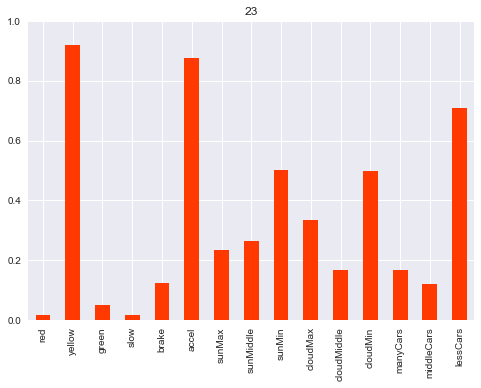

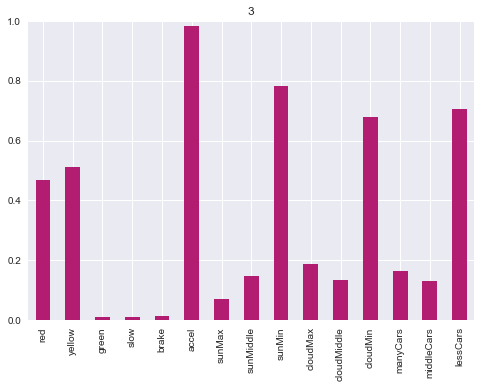

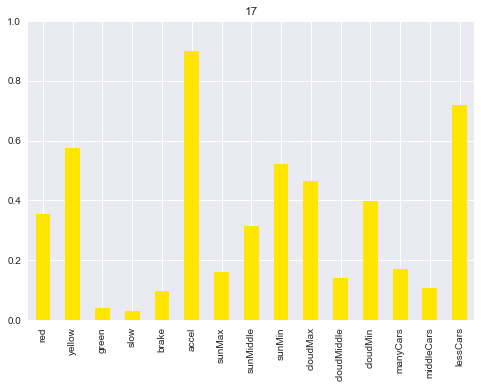

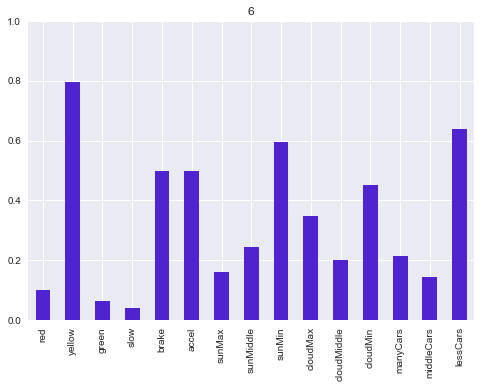

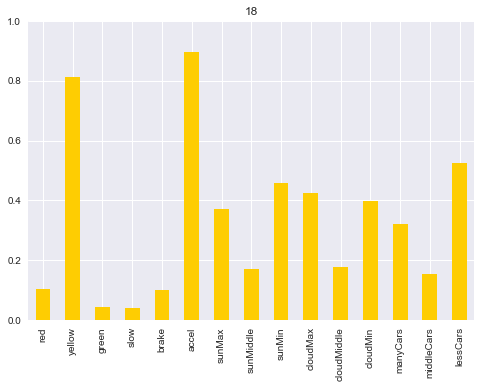

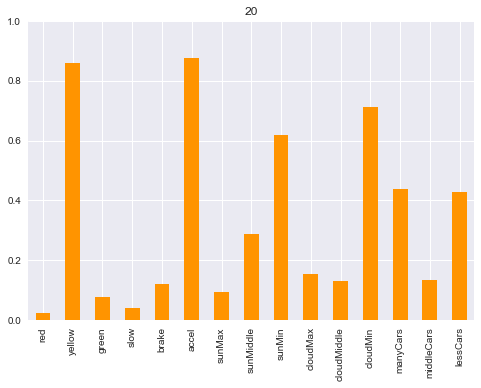

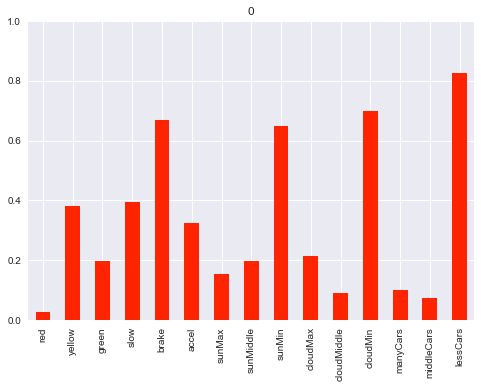

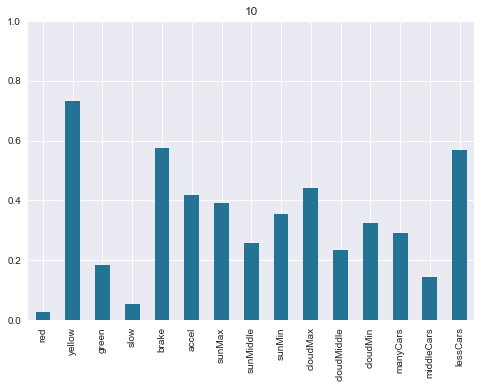

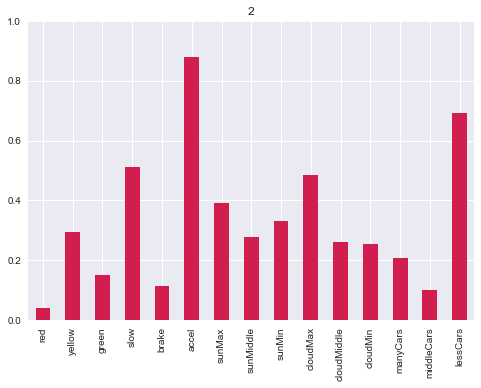

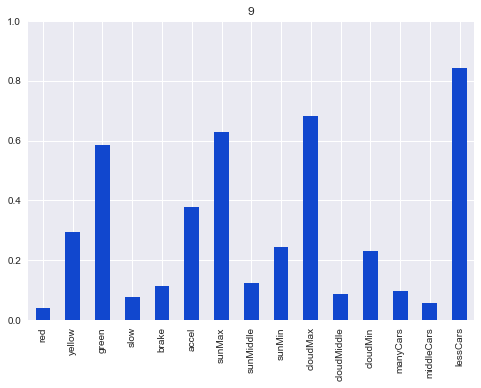

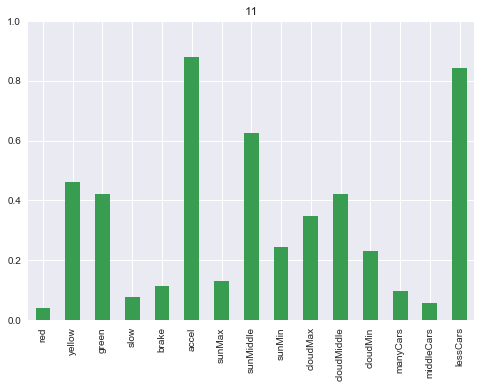

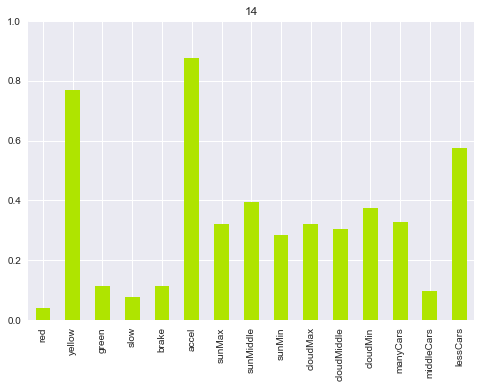

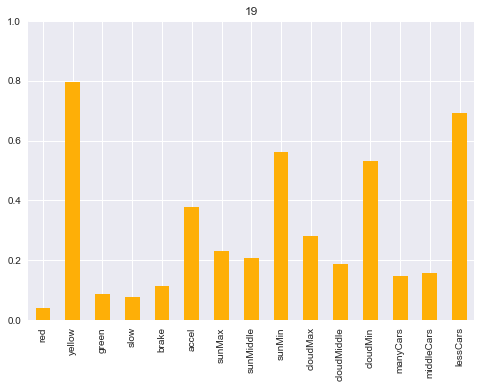

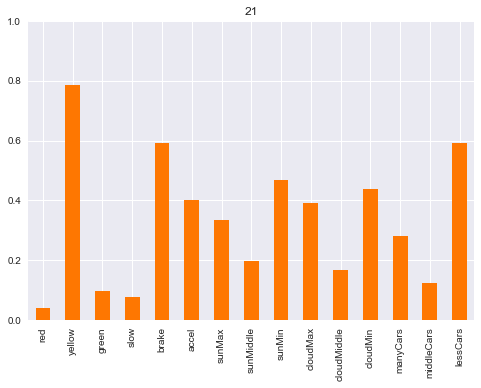

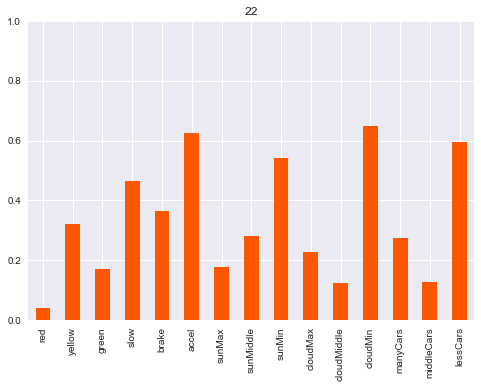

In [26]:
dir = "./img/Result1/clusters-" + str(sd)
if not os.path.exists(dir):
    os.mkdir(dir)

ref = ref[features]
for i in cls:
    ref.ix[i].plot(kind='bar', color=colors[i])
    plt.title(i)
    plt.ylim(0, 1)
    plt.savefig(dir + "/cluster" + str(i) + ".png")
    plt.show()

# Save

### 結果の保存

In [27]:
pred = zip(mf.index, vb.predict(bf))
result = np.zeros(gridSize)

for index, klass in pred:
    result[index] = klass + 1
    
np.savetxt(targetDir + "clusters.csv", result, delimiter=",", fmt="%d")

with open(dir + '/VBSetting.json', 'w') as outfile:
    data = {
        "n_components": components,
        "weight_concentration_prior": prior,
        "seed": sd
    }
    json.dump(data, outfile)

# Display Top-5

In [28]:
normedFeatures = [
    "red",  "yellow",  "green",
    "brake", "accel", "accelOff",
    "sunMax", "sunMiddle",
    "cloudMax", "cloudMiddle",
    "manyCars", "middleCars"
]

In [29]:
pathIndex = bf.index

In [30]:
top10Index =   [511, 223, 249, 277, 252, 633, 251, 253, 482, 244]

In [38]:
len(mf[mf["red"] > 0])

34

In [32]:
mf.ix[top10Index]

,red,yellow,green,slow,brake,accel,sunMax,sunMiddle,sunMin,cloudMax,cloudMiddle,cloudMin,manyCars,middleCars,lessCars
511,0,1,2,0,0,1,0,3,0,1,2,0,0,0,3
223,0,119,22,1,12,6,73,40,29,80,33,29,62,23,57
249,0,287,141,4,13,40,171,185,76,179,151,102,177,73,182
277,0,37,2,0,0,5,15,21,3,11,17,11,18,3,18
252,0,301,59,3,16,40,142,141,80,170,102,91,130,70,163
633,0,17,23,37,2,4,46,24,7,45,25,7,26,6,45
251,0,240,171,15,10,42,146,181,99,188,133,105,164,69,193
253,0,167,143,22,11,23,143,121,68,161,100,71,136,46,150
482,0,0,3,20,0,2,12,7,4,14,8,1,5,2,16
244,0,49,53,0,1,6,47,38,17,60,19,23,33,13,56


In [33]:
top10Color = vb.predict(bf.ix[top10Index])

In [34]:
df16 = pd.read_csv(accelOffDir + "result.csv")
df16.columns = [["id", "accelOff"]]
df16 = df16.ix[pathIndex]

In [35]:
cf = pd.concat([bf, df16], axis=1)
maxAccelOff = cf["accelOff"].sum()
cf["accelOff"] = cf["accelOff"] / maxAccelOff
cf = cf[normedFeatures]

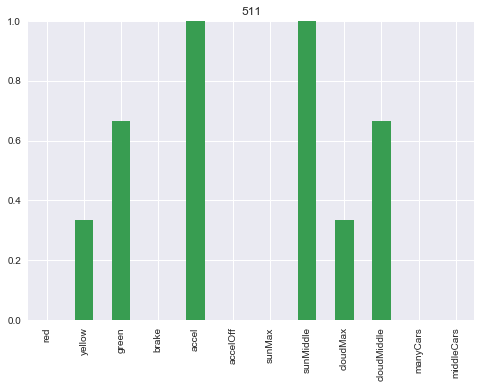

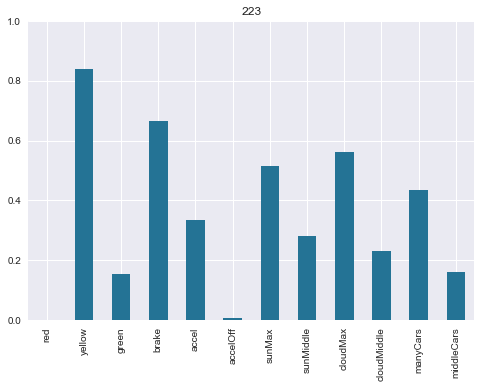

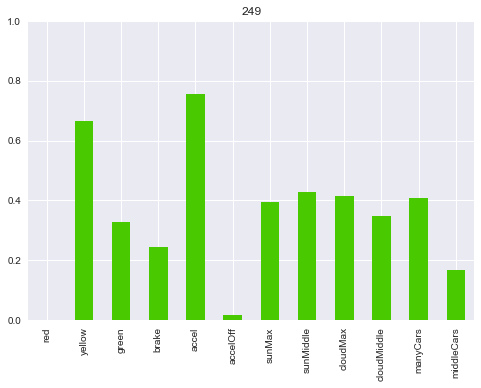

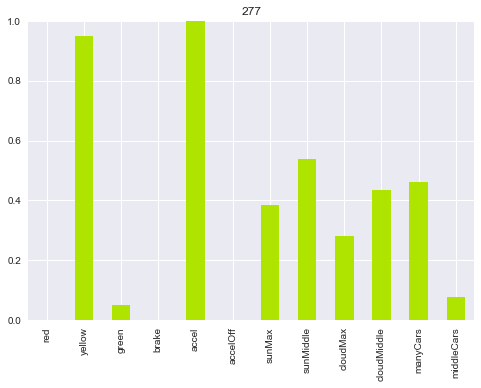

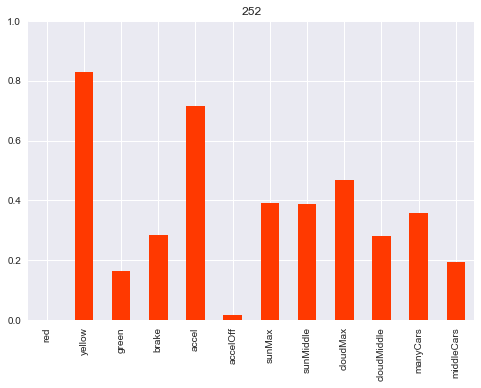

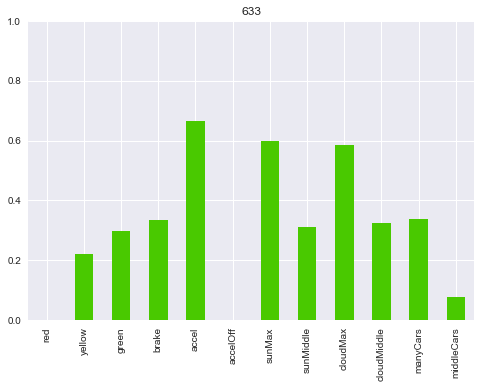

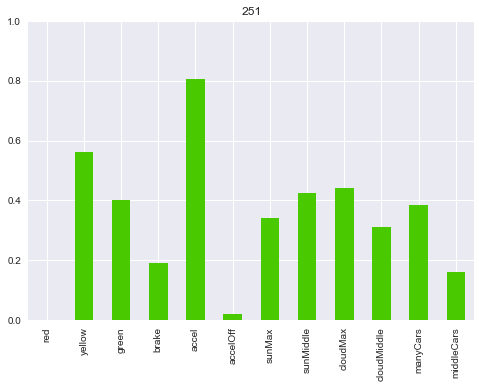

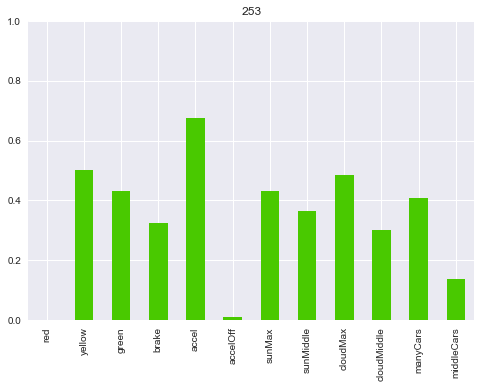

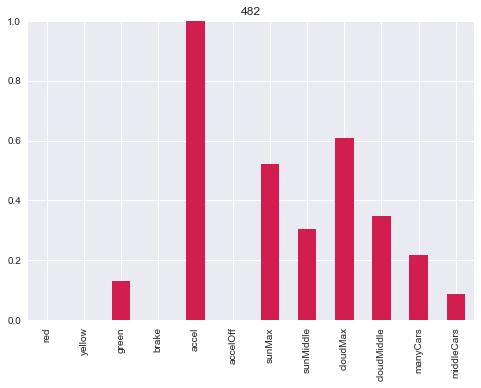

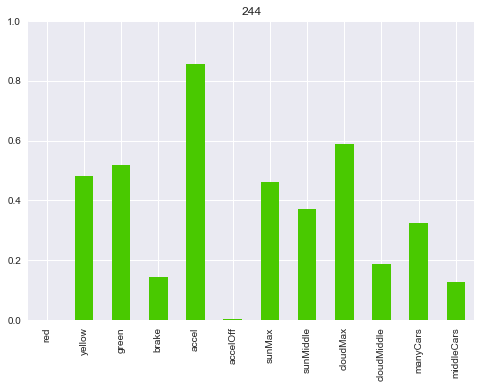

In [36]:
dir = "./img/Result1/clusters-" + str(sd)
if not os.path.exists(dir):
    os.mkdir(dir)
    
for i, ic in enumerate(zip(top10Index, top10Color)):
    cf.ix[ic[0]].plot(kind='bar', color=colors[ic[1]])
    plt.ylim(0, 1)
    plt.title(str(top10Index[i]))
    plt.savefig(dir + "/top10-" + str(i+1) + ".png")
    plt.show()